In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Write a Python code to implement a Factor analysis with the following features.

In [2]:
# Principal component method on correlation matrix

def pcm(corr):
    eigenValues, eigenVectors = np.linalg.eig(corr)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues, eigenVectors

In [3]:
# scree plot

def scree_plot(eigen_value) :
    eigval = pd.DataFrame()
    eigval['Eigenvalue'] = eigen_value
    eigval['Proportion'] = eigval['Eigenvalue'] / len(eigval)
    eigval['Cumulative'] = eigval['Proportion'].cumsum(axis=0)
    eigval
    
    plt.title('Scree Plot of Eigenvalues')
    plt.xlabel('Number')
    plt.plot(eigenValues, 'o-')
    plt.show()

In [4]:
# Factor loading matrix

def factor_loading_matrix(m, eigenValues, eigenVectors, corr) :

    loadings = pd.DataFrame(np.sqrt(eigenValues[0:m]) * eigenVectors[:, 0:m])
    columns = []
    for i in range(len(loadings.columns)) :
        name = "Factor"+str(i+1)
        columns.append(name)
    loadings.columns = columns
    loadings.index = corr.columns
    return np.round(loadings, 2)

In [5]:
# Communality

def communality(corr):
    L = factor_loading_matrix(2, eigenValues, eigenVectors, corr)

    commu = pd.DataFrame()
    commu['communality'] = np.diag(L @ L.T)
    commu.index = corr.columns
    return commu

## The weekly rates of return for five stocks listed on the New York Stock Exchange are given in 'stock.dat'. Use your Python code in #1 to answer the following questions.

In [6]:
# 데이터 불러오기
stock = pd.read_csv('stock.dat', header = None, delim_whitespace=True)
stock.columns = ['Allied_Chemical','du_Pont','Union_Carbide','Exxon','Texaco']
stock

,Allied_Chemical,du_Pont,Union_Carbide,Exxon,Texaco
0,0.000000,0.000000,0.000000,0.039473,-0.000000
1,0.027027,-0.044855,-0.003030,-0.014466,0.043478
2,0.122807,0.060773,0.088146,0.086238,0.078124
3,0.057031,0.029948,0.066808,0.013513,0.019512
4,0.063670,-0.003793,-0.039788,-0.018644,-0.024154
...,...,...,...,...,...
95,0.000000,-0.020080,-0.006579,0.029925,-0.004807
96,0.021429,0.049180,0.006622,-0.002421,0.028985
97,0.045454,0.046375,0.074561,0.014563,0.018779
98,0.050167,0.036380,0.004082,-0.011961,0.009216


In [7]:
# Correlation matrix 구하기

corr = stock.corr()
corr

,Allied_Chemical,du_Pont,Union_Carbide,Exxon,Texaco
Allied_Chemical,1.000000,0.576924,0.508656,0.386721,0.462178
du_Pont,0.576924,1.000000,0.598384,0.389519,0.321953
Union_Carbide,0.508656,0.598384,1.000000,0.436101,0.425627
Exxon,0.386721,0.389519,0.436101,1.000000,0.523529
Texaco,0.462178,0.321953,0.425627,0.523529,1.000000


## A. Perform a factor analysis on the sample correlation matrix.

In [8]:
eigenValues, eigenVectors = pcm(corr)
print("eigenvalues : {}".format(eigenValues))
print("eigenvectors : {}".format(eigenVectors))

eigenvalues : [2.85648688 0.8091185  0.54004398 0.45134682 0.34300382]
eigenvectors : [[ 0.46354054  0.24084986  0.61335698 -0.38137266  0.45328757]
 [ 0.45707636  0.5090997  -0.17789962 -0.21130679 -0.67498139]
 [ 0.46998043  0.26057743 -0.33703554  0.66409849  0.39572471]
 [ 0.42167703 -0.52526472 -0.53901809 -0.47280364  0.17944825]
 [ 0.42132914 -0.58224156  0.4336029   0.3812273  -0.38746715]]


## B. How many factors are required to describe adequately the space in which these data fall?

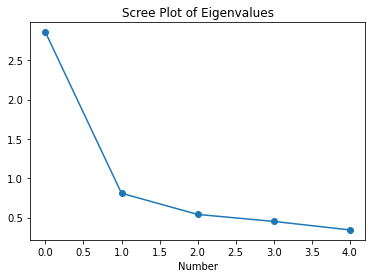

In [9]:
scree_plot(eigenValues)

## C. Obtain the factor loading matrix.

In [10]:
factor_loading_matrix(2, eigenValues, eigenVectors, corr)

,Factor1,Factor2
Allied_Chemical,0.78,0.22
du_Pont,0.77,0.46
Union_Carbide,0.79,0.23
Exxon,0.71,-0.47
Texaco,0.71,-0.52


## D. Obtain the communality of each variable.

In [11]:
communality(corr)

,communality
Allied_Chemical,0.6568
du_Pont,0.8045
Union_Carbide,0.6770
Exxon,0.7250
Texaco,0.7745


In [12]:
# Texaco : 석유, 천연가스, 석유화학
# Exxon : 석유화학
# Union Carbide : 화학 제품 (폴리머)
# Du pont : 화학제품 (폴리머)
# Allied_Chemical : 화학 제품

# Factor 1 : 석유 화학 산업
# Factor 2 : 업종 세분화 - 석유 / 화학



## Use the 'factor_analyzer' package of Python to answer the questions below.

In [13]:
from factor_analyzer import FactorAnalyzer

## F. Obtain the factor (before rotation) loading matrix using Minres method.

In [14]:
fa = FactorAnalyzer(n_factors=2, rotation=None, method='minres', is_corr_matrix=True)
fa.fit(corr)

FactorAnalyzer(is_corr_matrix=True, n_factors=2, rotation=None,
               rotation_kwargs={})

In [15]:
# Factor Variances
fvar = pd.DataFrame(fa.get_factor_variance()).T
fvar.index = ['Factor1', 'Factor2']
fvar.columns = ['Variance','Proportion','Cumulative']
fvar

,Variance,Proportion,Cumulative
Factor1,2.462669,0.492534,0.492534
Factor2,0.527965,0.105593,0.598127


In [16]:
# Factor Loadings
loadings = pd.DataFrame(fa.loadings_, 
                        index = stock.columns, 
                        columns = ['Factor1', 'Factor2'])
loadings

,Factor1,Factor2
Allied_Chemical,0.696010,-0.096709
du_Pont,0.758582,-0.418575
Union_Carbide,0.715361,-0.146355
Exxon,0.606299,0.156562
Texaco,0.723501,0.545413


In [17]:
# Communality
pd.DataFrame(fa.get_communalities(), 
             index=stock.columns, 
             columns=['Communality'])

,Communality
Allied_Chemical,0.493783
du_Pont,0.750651
Union_Carbide,0.533161
Exxon,0.392110
Texaco,0.820929


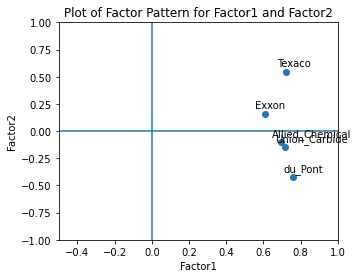

In [18]:
# Preplot(Before Rotation)
x = loadings.Factor1 ; y = loadings.Factor2
plt.figure(figsize = (5,4))
plt.title('Plot of Factor Pattern for Factor1 and Factor2')
plt.xlabel('Factor1') ; plt.ylabel('Factor2')
plt.scatter(x,y)
for i in range(len(loadings)):
    plt.text(x[i]-0.05, y[i]+0.05, loadings.index[i])
plt.axvline(x = 0) ; plt.axhline(y = 0) 
plt.xlim(-0.5,1); plt.ylim(-1,1)
plt.show()

## G. Obtain the factor (after rotation) loading matrix using Minres method

In [19]:
# Rotation Method: Varimax
fa2 = FactorAnalyzer(n_factors=2, rotation='varimax', method='minres', is_corr_matrix=True)
fa2.fit(corr)

FactorAnalyzer(is_corr_matrix=True, n_factors=2, rotation='varimax',
               rotation_kwargs={})

In [20]:
# Orthogonal Transformation Matrix
fa2.rotation_matrix_

array([[ 0.76844412,  0.63991689],
       [-0.63991689,  0.76844412]])

In [21]:
# Rotated Factor Pattern
Rloadings = pd.DataFrame(fa2.loadings_, 
             index = stock.columns, 
             columns = ['Factor1', 'Factor2'])
Rloadings

,Factor1,Factor2
Allied_Chemical,0.596731,0.371073
du_Pont,0.850781,0.163778
Union_Carbide,0.643369,0.345306
Exxon,0.365720,0.508290
Texaco,0.206951,0.882100


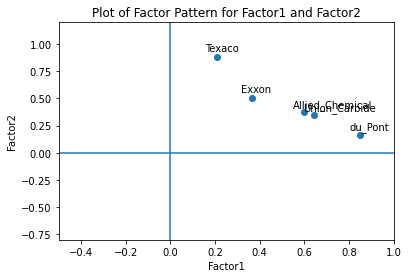

In [22]:
# Plot(After Rotation)
x = Rloadings.Factor1 ; y = Rloadings.Factor2
plt.figure(figsize = (6,4))
plt.title('Plot of Factor Pattern for Factor1 and Factor2')
plt.xlabel('Factor1') ; plt.ylabel('Factor2')
plt.scatter(x,y)
for i in range(len(loadings)):
    plt.text(x[i]-0.05, y[i]+0.05, Rloadings.index[i])
plt.axvline(x = 0) ; plt.axhline(y = 0) 
plt.xlim(-0.5,1); plt.ylim(-0.8,1.2)
plt.show()

In [23]:
# Factor Variances
fvar = pd.DataFrame(fa2.get_factor_variance()).T
fvar.index = ['Factor1', 'Factor2']
fvar.columns = ['Variance','Proportion','Cumulative']
fvar

,Variance,Proportion,Cumulative
Factor1,1.670420,0.334084,0.334084
Factor2,1.320214,0.264043,0.598127


## H. Obtain the communalities (after rotation) of each variable.

In [24]:
# Communality
pd.DataFrame(fa2.get_communalities(), 
             index=stock.columns, 
             columns=['Communality'])

,Communality
Allied_Chemical,0.493783
du_Pont,0.750651
Union_Carbide,0.533161
Exxon,0.392110
Texaco,0.820929


## I. Identify the underlying characteristics of each factor.